<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/StrokePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import random
%matplotlib inline

In [61]:
#importing our cancer dataset
dataset = pd.read_csv('/content/drive/MyDrive/StrokeDataset/healthcare-dataset-stroke-data.csv')
col_list = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


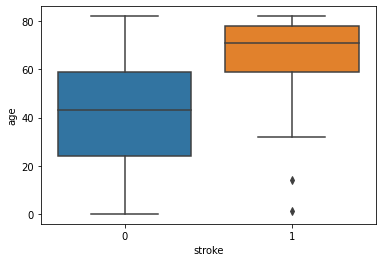

In [62]:
sns.boxplot(x='stroke', y='age', data=dataset)


In [63]:
#Taking care of BMI's NAN values 
dataset = dataset.fillna(dataset.mean())

In [64]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder
print (dataset['smoking_status'].unique())

# creating instance of labelencoder
labelencoder = LabelEncoder()
# creating initial dataframe
#smoking_statuses = ('formerly smoked','never smoked','smokes','Unknown')
#bridge_df = pd.DataFrame(smoking_statuses, columns=['smoking_status'])


# Assigning numerical values and storing in another column
#Smoking Status 
dataset['smoking_statuses'] = labelencoder.fit_transform(dataset['smoking_status'])
dataset = dataset.drop('smoking_status',axis=1)
#work type
dataset['work_types'] = labelencoder.fit_transform(dataset['work_type'])
dataset = dataset.drop('work_type',axis=1)
#Residence Type
dataset['Residence_types'] = labelencoder.fit_transform(dataset['Residence_type'])
dataset = dataset.drop('Residence_type',axis=1)
#Gender 
dataset['genders'] = labelencoder.fit_transform(dataset['gender'])
dataset = dataset.drop('gender',axis=1)
#Gender 
dataset['Ever_Married'] = labelencoder.fit_transform(dataset['ever_married'])
dataset = dataset.drop('ever_married',axis=1)

dataset

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_statuses,work_types,Residence_types,genders,Ever_Married
0,9046,67.0,0,1,228.69,36.600000,1,1,2,1,1,1
1,51676,61.0,0,0,202.21,28.893237,1,2,3,0,0,1
2,31112,80.0,0,1,105.92,32.500000,1,2,2,0,1,1
3,60182,49.0,0,0,171.23,34.400000,1,3,2,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,2,2,1,0,1
5106,44873,81.0,0,0,125.20,40.000000,0,2,3,1,0,1
5107,19723,35.0,0,0,82.99,30.600000,0,2,3,0,0,1
5108,37544,51.0,0,0,166.29,25.600000,0,1,2,0,1,1


In [65]:
old_cols = dataset.columns.values 
new_cols= ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi','smoking_statuses','work_types','Residence_types','genders','Ever_Married','stroke']
dataset = dataset.reindex(columns=new_cols)
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_statuses,work_types,Residence_types,genders,Ever_Married,stroke
0,67.0,0,1,228.69,36.600000,1,2,1,1,1,1
1,61.0,0,0,202.21,28.893237,2,3,0,0,1,1
2,80.0,0,1,105.92,32.500000,2,2,0,1,1,1
3,49.0,0,0,171.23,34.400000,3,2,1,0,1,1
4,79.0,1,0,174.12,24.000000,2,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,2,2,1,0,1,0
5106,81.0,0,0,125.20,40.000000,2,3,1,0,1,0
5107,35.0,0,0,82.99,30.600000,2,3,0,0,1,0
5108,51.0,0,0,166.29,25.600000,1,2,0,1,1,0


In [69]:
col_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi','smoking_statuses','work_types','Residence_types','genders','Ever_Married']
X = dataset[col_list]
Y = dataset['stroke']
print(X)
print(Y)

       age  hypertension  heart_disease  ...  Residence_types  genders  Ever_Married
0     67.0             0              1  ...                1        1             1
1     61.0             0              0  ...                0        0             1
2     80.0             0              1  ...                0        1             1
3     49.0             0              0  ...                1        0             1
4     79.0             1              0  ...                0        0             1
...    ...           ...            ...  ...              ...      ...           ...
5105  80.0             1              0  ...                1        0             1
5106  81.0             0              0  ...                1        0             1
5107  35.0             0              0  ...                0        0             1
5108  51.0             0              0  ...                0        1             1
5109  44.0             0              0  ...                1    

In [70]:
#checking all nulls 
dataset.isnull().sum()
dataset.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_statuses     0
work_types           0
Residence_types      0
genders              0
Ever_Married         0
stroke               0
dtype: int64

In [71]:
# Splitting the dataset into the Training set and Test set
print( type(X))
print(type(Y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [72]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier






#Using Logistic Regression Algorithm to the Training Set
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          GaussianNB(),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
          DecisionTreeClassifier(criterion = 'entropy', ),
          AdaBoostClassifier(n_estimators=100)
          ]

CV = 5 
entries = []
for model in models: 
    counter = 2
    model_name = model.__class__.__name__
    for i in range(len(entries)):
      if (str(model_name) in entries[i]):
       model_name = model_name + "V" + str(counter)
    classifier = model

    clf = classifier.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    entries.append((model_name, accuracy*100))
print(len(entries))
entries

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8


[('LogisticRegression', 94.78147423352902),
 ('KNeighborsClassifier', 94.52054794520548),
 ('SVC', 94.78147423352902),
 ('SVCV2', 94.78147423352902),
 ('GaussianNB', 87.01891715590345),
 ('RandomForestClassifier', 94.52054794520548),
 ('DecisionTreeClassifier', 91.32420091324201),
 ('AdaBoostClassifier', 94.65101108936726)]

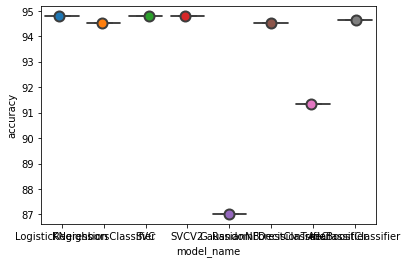

In [74]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

               Specs        Score
0                age  3635.226911
3  avg_glucose_level  1718.285446
2      heart_disease    87.987436
1       hypertension    75.449498
9       Ever_Married    20.622787
4                bmi    15.894122
5   smoking_statuses     3.369423
6         work_types     2.925901
7    Residence_types     0.600717
8            genders     0.239001
[0.32 0.01 0.01 0.31 0.27 0.   0.06 0.   0.01 0.01]


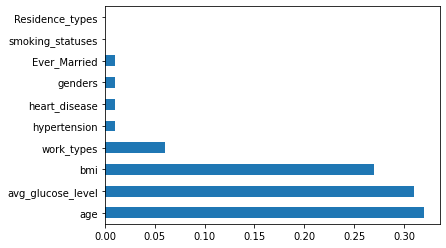

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset = dataset.reindex(columns=new_cols)

X = dataset.iloc[:,0:10]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
